In [180]:
import dendropy

In [181]:
t = "[&R] ((3:0.0360971597765934,2:3.339535381892265):0.0360971597765934,(1:0.0360971597765934,0:3.339535381892265):0.0360971597765934);"
true_tree = dendropy.Tree.get(data=t, schema="newick")

In [182]:
print(true_tree)

((3:0.0360971597765934,2:3.339535381892265):0.0360971597765934,(1:0.0360971597765934,0:3.339535381892265):0.0360971597765934)


In [183]:
import os, glob
import pickle

# pair = [0, 1]
# tree_dict = dict()
est_dicts = dict()
for k in (20, 30, 40, 50, 100, 200, 300, 400, 500, 1000): #, 5000):
    filename = "/Users/gillianchu/raphael/repos/problin/results_estbl/estdict_m10_k{0}_estbl.pkl".format(k)

    with open(filename, "rb") as f:
        est_dict = pickle.load(f)
        # print('est_dict', filename, est_dict)
        if k not in est_dicts.keys():
            est_dicts[k] = []
        est_dicts[k].append(est_dict)

In [184]:
k=20
i = 0
est_dicts[k][0][i]

{(0, 1): [2.9950826014855783, 0.16248248398910725, 0.02564664719377529],
 (0, 2): [2.983055836921778, 2.982098173138772, 0.02564664719377529],
 (0, 3): [2.996440057155868, 0.22320312062972764, 0.02564664719377529],
 (1, 2): [0.1624470651813801, 2.995054498919489, 0.02564664719628598],
 (1, 3): [0.16248475313007457, 0.22341552951590615, 0.025646647286514702],
 (2, 3): [2.9151475465875722, 0.1433875844210946, 0.07973879392658213]}

In [185]:
import numpy as np

x = []
y = dict()

true_dist_dict = dict()

all_pairs = dict()
for k in (20, 30, 40, 50, 100, 200, 300, 400, 500, 1000): #, 5000):
    pair_dict = dict()
    for i in range(len(est_dicts[k][0])):
        est_dict = est_dicts[k][0][i]
        for pair in est_dict.keys():
            if pair not in pair_dict.keys():
                pair_dict[pair] = []
            pair_dict[pair].append(est_dict[(pair)])
    all_pairs[k] = pair_dict
    # print(pair_dict)
    true_pdm = true_tree.phylogenetic_distance_matrix()
    for idx1, taxon1 in enumerate(true_tree.taxon_namespace):
            for taxon2 in true_tree.taxon_namespace:
                true_dist = true_pdm.patristic_distance(taxon1, taxon2)
                pair = (int(taxon1.label), int(taxon2.label))
                true_dist_dict[pair] = true_dist

                # compute the error between the true_dist and the new
                if pair in pair_dict.keys():
                    rmse = np.sqrt(((np.array([true_dist]*len(pair_dict[pair])) - np.array([sum(x[:2]) for x in pair_dict[pair]]))**2).mean())
                    if pair not in y:
                        y[pair] = []
                    y[pair].append(rmse)
    x.append(k)

In [186]:
true_dist_dict

{(3, 3): 0.0,
 (3, 2): 3.3756325416688586,
 (3, 1): 0.1443886391063736,
 (3, 0): 3.4478268612220453,
 (2, 3): 3.3756325416688586,
 (2, 2): 0.0,
 (2, 1): 3.4478268612220457,
 (2, 0): 6.751265083337717,
 (1, 3): 0.1443886391063736,
 (1, 2): 3.4478268612220457,
 (1, 1): 0.0,
 (1, 0): 3.3756325416688586,
 (0, 3): 3.4478268612220453,
 (0, 2): 6.751265083337717,
 (0, 1): 3.3756325416688586,
 (0, 0): 0.0}

In [187]:
np.array([sum(x[:2]) for x in all_pairs[20][(0, 1)]]).mean()

4.310847389546701

In [188]:
np.array([sum(x[:2]) for x in all_pairs[20][(1, 3)]]).mean()

0.1565547532794145

In [189]:
np.array([sum(x[:2]) for x in all_pairs[20][(0, 2)]]).mean()

8.645679909587386

In [190]:
all_pairs[40][(0, 1)]

[[3.6759060006016044, 0.06502655569339535, 0.012971186519286715],
 [2.9505996897044855, 0.0328111067520264, 0.04512122076083745],
 [2.9960118188495253, 0.07791884416095815, 0.012659028494380883],
 [2.9506293430616695, 0.032797546028661605, 0.04512832431526483],
 [3.689533146430126, 0.05124083960149719, 0.012658903998215386],
 [3.665674553590168, 0.012658903992144949, 0.022836937999143853],
 [3.585398241840302, 0.012658903992144949, 0.10289823428804507],
 [2.950533777118111, 0.032815642939127504, 0.045123284129136104],
 [3.6895541681824255, 0.012658903992144949, 0.012658903992144949],
 [2.972860105024213, 0.012658903992144949, 0.02294810783516478],
 [2.995695448960677, 0.025342918196985854, 0.012658904072017677],
 [7.3777589082278725, 0.03236740764795628, 0.018944842314172875],
 [2.9626300770449143, 0.10055101423188113, 0.03295351338741994],
 [2.9722701959876874, 0.012658908390471577, 0.022939594785225174],
 [2.9563611140896233, 0.06627849751439616, 0.0390673640118259],
 [2.570746284867

In [191]:
y

{(2, 3): [1.9574083458558504,
  2.156717465444656,
  2.104145639124162,
  1.8491534444051951,
  1.1303189448076247,
  0.5475609320368637,
  0.35977457993067663,
  0.290410632619147,
  0.25810571201256277,
  0.2024282888328294],
 (1, 3): [0.0768760188758368,
  0.06760586800214519,
  0.05997028549475294,
  0.053183740129123046,
  0.03781114758614023,
  0.02630016093381896,
  0.022254961481749304,
  0.019658326099208107,
  0.017298421706040144,
  0.01227257595780623],
 (1, 2): [1.927302061220526,
  2.130573308008049,
  2.0799673431892503,
  1.8320072013682258,
  1.1240833101687695,
  0.544909478646253,
  0.3577962393055794,
  0.2895083088288004,
  0.29854487061003787,
  0.3029291743715794],
 (0, 3): [1.865150873543375,
  2.1050873767248928,
  2.0411650205762886,
  1.84723364589992,
  1.0579432344276616,
  0.477272876218543,
  0.3621939939872276,
  0.2824966228018957,
  0.24980532404252515,
  0.17219407738309073],
 (0, 2): [2.962068958799339,
  3.36234082834925,
  3.128013986830294,
  2.74

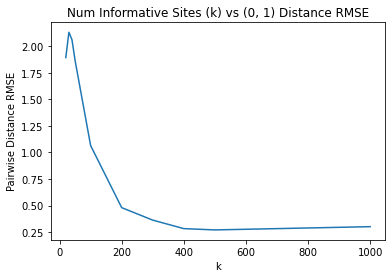

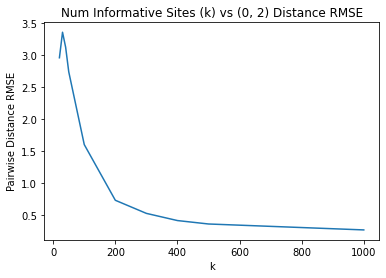

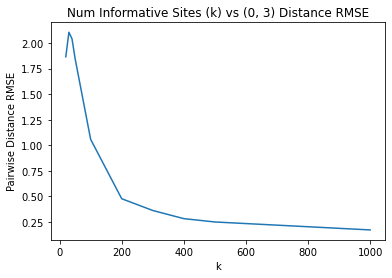

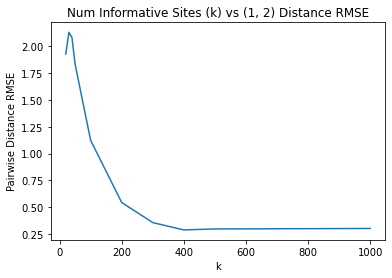

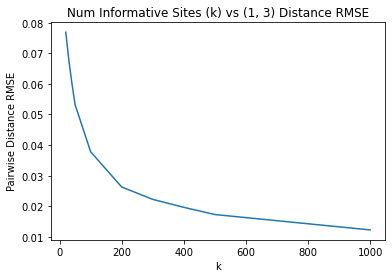

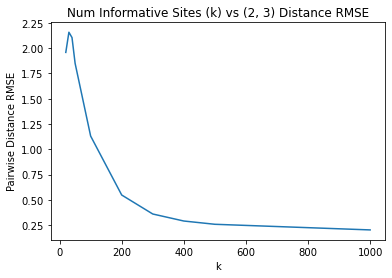

In [192]:
import matplotlib.pyplot as plt

for pair in pair_dict.keys():
    plt.title("Num Informative Sites (k) vs {0} Distance RMSE".format(pair))
    plt.plot(x, y[pair])
    ax = plt.gca()
#     ax.set_ylim([0,5])
    plt.xlabel("k")
    plt.ylabel("Pairwise Distance RMSE")
    plt.savefig('/Users/gillianchu/raphael/repos/problin/results_estbl/plots/pair_{0}_{1}.jpg'.format(pair[0], pair[1]))
    plt.show()